# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [5]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10,200,401]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   3366   5403    12974    4400              5977          1744
1   3067  13240    23127    3941              9959           731
2  27167   2801     2128   13223                92          1902

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 




                     Fresh          Milk       Grocery        Frozen  \
10             3366.000000   5403.000000  12974.000000   4400.000000   
200            3067.000000  13240.000000  23127.000000   3941.000000   
401           27167.000000   2801.000000   2128.000000  13223.000000   
Dataset-Mean  12000.297727   5796.265909   7951.277273   3071.931818   

              Detergents_Paper  Delicatessen  
10                 5977.000000   1744.000000  
200                9959.000000    731.000000  
401                  92.000000   1902.000000  
Dataset-Mean       2881.493182   1524.870455  


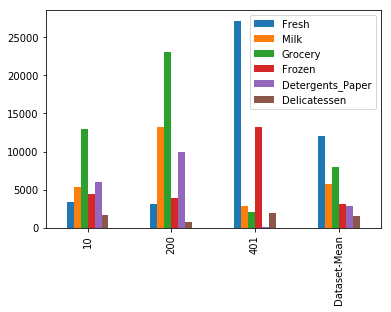

In [7]:
## For easy comparison against mean, lets draw a bar chart 


## Lets first get mean of the dataset
## Could have used data.mean() but it returns a dataframe. Its easy to use describe and loc and get it as a list
#mean_data_set = data.describe().loc['mean', :]
mean_data_set = data.mean()
bar_data = samples.append(mean_data_set,ignore_index=True)
## Replace indexes of rows 0,1,2,3 with indexes of sample data 
bar_data.index = [10,200,401,"Dataset-Mean"]
print(bar_data)
bar_data.plot(kind="bar")

**Answer:**

* Index : 10

  * Very High in grocery and Detergents paper compared to dataset mean for these categories . Very low value of fresh when compared to dataset  mean. Delicious things are more or less same compared to the average mean. Fresh is also less compared to the average mean. This indicates that it is departmental store. 
  
* Index : 200

    * Very high in milk, grocery and detergents paper compared to avarage mean for these categories. Along with Less values in Fresh and delicious things points to a big retailer.
    

* Index : 401

    * Very high in Fresh and Frozen , Very low in Detergent paper , little bit higher in delicious things ( above 75% quartile). This seems to indicate a restaurant . Less grocery but more frozen and fresh indicates that it may be pre-dominantly a non-vegetarian restaurant. 
 



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
new_data = data.drop("Grocery",axis=1)
## Check to ensure the column grocery is dropped
print(new_data.head(5))
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data,data["Grocery"], test_size = 0.25,random_state=10)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=10).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
grocery_removed_score = regressor.score(X_test,y_test)

print("The reported score is {}".format(grocery_removed_score))



   Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  8808    2405              3516          7844
3  13265  1196    6404               507          1788
4  22615  5410    3915              1777          5185
The reported score is 0.723800832652


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* I attemped to predict the grocery feature
* The reported prediction score was 0.7238
* The score is not too high for grocery to be dropped. Hence this feature might be necessary for identifying customers spending habits. As an excerise, i tried to predict R2 Score for other features in the dataset. (code below)

   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  9656     7561     214              2674          1338
1  9810     9568    1762              3293          1776
2  8808     7684    2405              3516          7844
3  1196     4221    6404               507          1788
4  5410     7198    3915              1777          5185
Dropped feature is Fresh . The reported score is -0.379170072447


   Fresh  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669     7561     214              2674          1338
1   7057     9568    1762              3293          1776
2   6353     7684    2405              3516          7844
3  13265     4221    6404               507          1788
4  22615     7198    3915              1777          5185
Dropped feature is Milk . The reported score is -0.442085754637


   Fresh  Milk  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     214              2674          1338
1   7057  9810    1762              3293          1776
2   6353  88

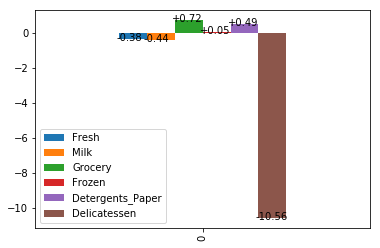

In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
## Now let us try to have other features except grocery as dependent variable and see the R Scores to understand how relevant
## they are for prediction
features=list(data.columns.values)
features_score=[]
for feature_value in features:
    new_data = data.drop(feature_value,axis=1)
    ## Just to check whether the required feature is dropped. 
    print(new_data.head(5))
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data,data[feature_value], test_size = 0.25,random_state=10)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=10).fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    features_score.append(score)
    print("Dropped feature is {} . The reported score is {}".format(feature_value,score))
    print("\n")
## For easy comparison against mean, lets draw a bar chart
df_score= pd.DataFrame(features_score)
print(df_score)
df_score.index = list(data.columns.values)

print(df_score)
df_score_transpose = df_score.transpose()
print(features_score)
ax = df_score_transpose.plot(kind="bar")

x_offset = -0.05
y_offset = -0.08
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
## Reference code looked at for annotation on top of bar chart 
## https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa


## Interpretation of Results

* The scores for Fresh,Milk, and Delicacies (Declicatessen) are negative . These indicates that the features are very relevant and cannot be dropped
* High negative score for Delicasies indicate that this feature is very very important 
* Scores for Frozen is positive but the score is very less indicating that the feature is also important
* Grocery and Detergents paper have the highest scores , but still they are not at a level which we can consider for the feature to be dropped. 




### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

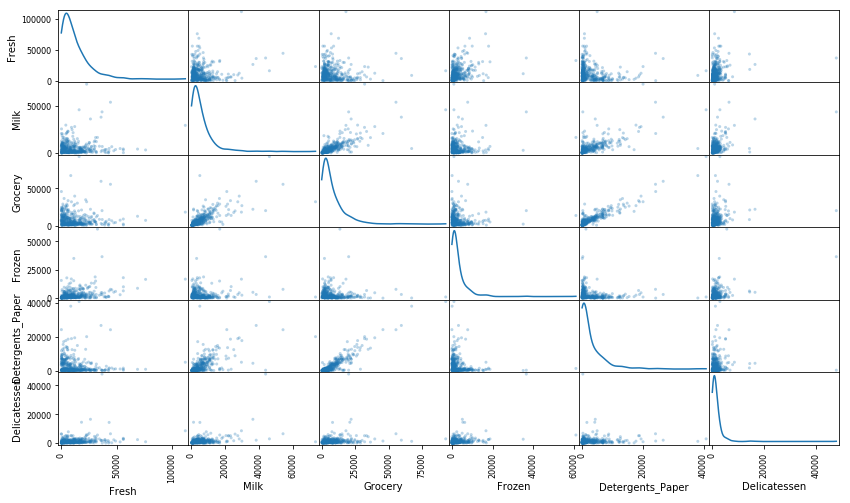

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

## Inference from Scatter Plot
* Scatter Plot interpretation : The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship. If the data points make a straight line going from the origin out to high x- and y-values, then the variables are said to have a positive correlation. If the line goes from a high-value on the y-axis down to a high-value on the x-axis, the variables have a negative correlation. Source(https://www.evl.uic.edu/aej/424/kyoung/Training-scatterplot.html) 

* By looking at the graph
    * Grocery seems to have no co-relation with all other features.
    * There might still exist few other weak co-relations but it is difficult to see from the scatter plot. Eg : Detergents 
      paper and milk, but it is difficult to visualise. Best way is to draw a heat map using data in dataframe. 
      code below. 
    * For seeing whether the data is normally distributed or not, we can use the plot graph. 

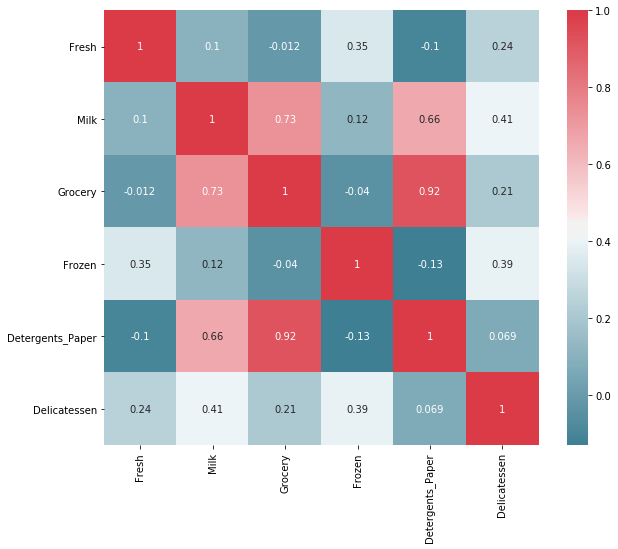

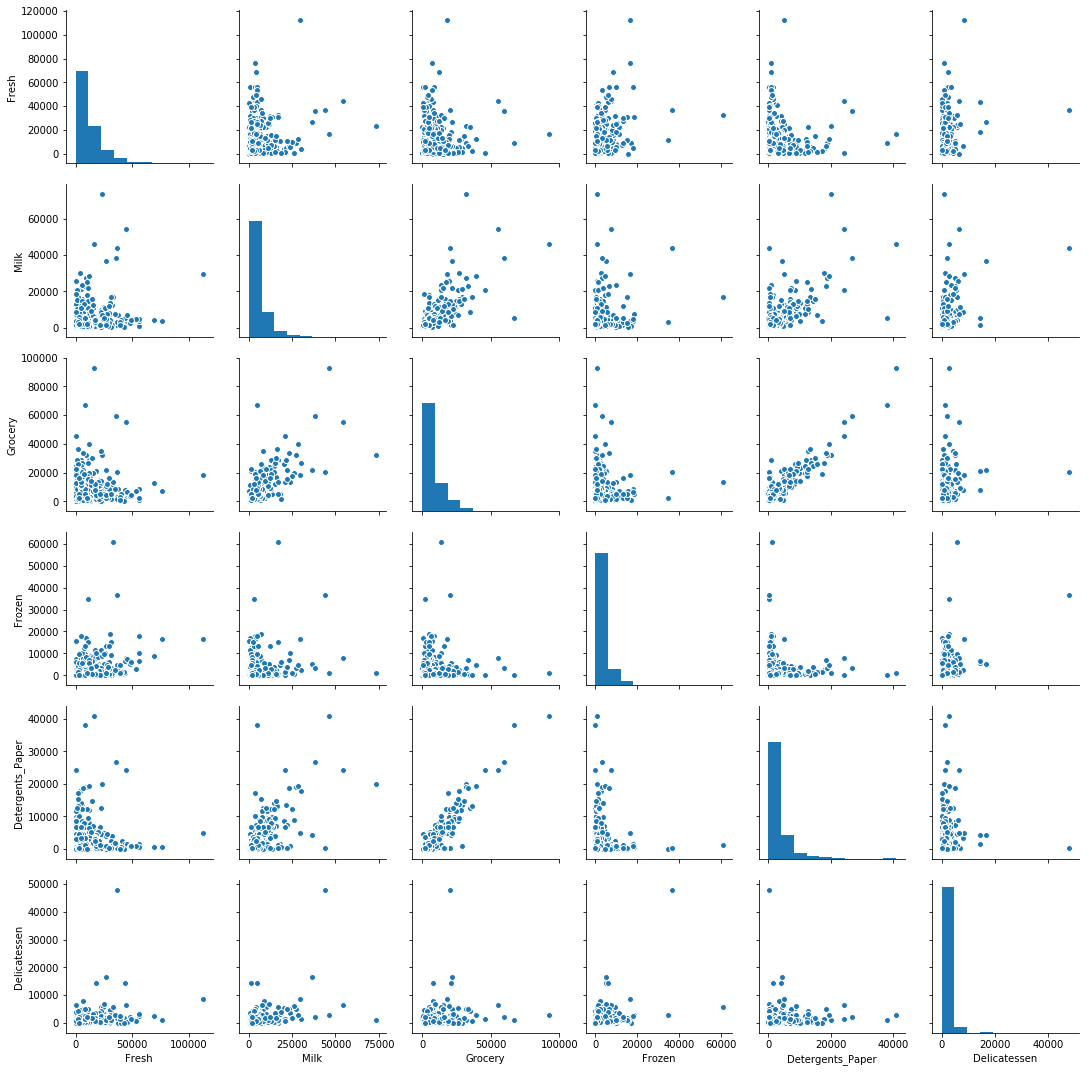

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plot_data =pd.DataFrame(data)
f, ax = plt.subplots(figsize=(10, 8))
corr = plot_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
sns.pairplot(data)

## Inference (Contd...)

The following pairs seems to have a higher co-relation (written in order of highest co-relation from highest to weakest)
* Grocery and Detergents paper
* Milk and Grocery
* Milk & Detergents Paper.

The above results lends support to the fact that Grocery may not be a necessary feature to determine customer spending habits

* The plot graphs clearly shows that the data is positively skewed and there are lot of outliers. 
* For proper interpretation, outliers have to be removed and we need to make the data normally distributed. without normally 
  distributed data , algorithms might be giving wrong results. 
* Making the data normally distributed, might lead to newer results and we need to wait and see how this spans out.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

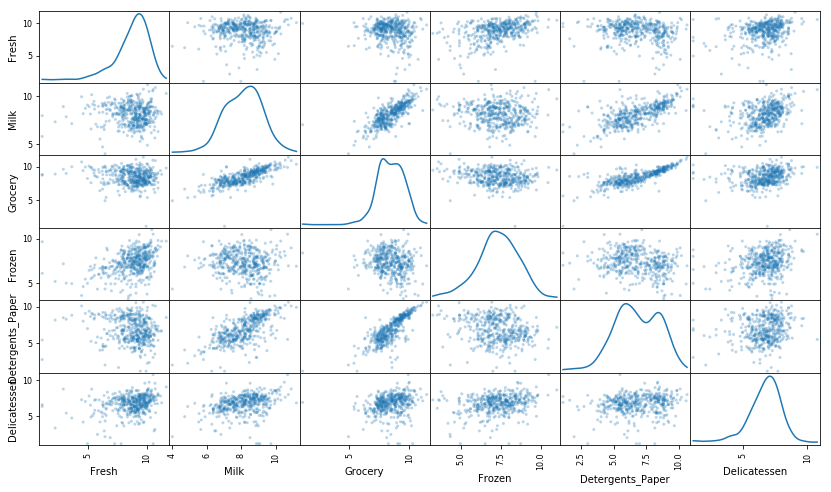

In [12]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [13]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.121480  8.594710   9.470703  8.389360          8.695674      7.463937
1   8.028455  9.490998  10.048756  8.279190          9.206232      6.594413
2  10.209758  7.937732   7.662938  9.489713          4.521789      7.550661

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [14]:
import itertools as itt
# For each feature find the data points with extreme high or low values
outliers_list=[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    print(outliers)
    ## Converting to  a list of outliers
    outliers_list.append(outliers.index.tolist())
    
  
# Currently the list is two dimensional, need to flatten the list. 
outliers = list(itt.chain.from_iterable(outliers_list))



print("Outliers reported are")
print("---------------------")
print(outliers)
print("\n")

outliers = [int(i) for i in outliers]
print(outliers)
print("Total outliers reported is {}".format(len(outliers)))
print("\n")
## Lets find duplicate outliers among them so that they can be removed. 
duplicate_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
print("Duplicate outliers is {}".format(duplicate_outliers))
print("\n")
print("Total duplicate outliers reported is {}".format(len(duplicate_outliers)))
## print the data associated with the outliers
print("\n")
print("Data Associated with duplicate outliers")
print(data.iloc[duplicate_outliers])


Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050 

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

         Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

         Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

         Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.1779

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Answer ***

* Duplicate outliers are rows [128, 65, 66, 75, 154] in dataset. 
* They occur more than once and is not a general representative sample. These outliers could be removed. 
* Mean as a statistic are prone to outliers. Clustering algorithms like K-means use mean as a statistical parameter and having outliers will negatively impact the result. clustering algorithms updates the cluster centers by taking the average of all the data points that are closer to each cluster center. If outliers are then then the cluster centers will be wrongly calculated resulting in wrong results. Hence it is very important to remove these duplicate outliers from the dataset. 

Reference Material : 
 http://www.math.uconn.edu/~gan/ggpaper/gan2017kmor.pdf
 https://www.mathsisfun.com/data/outliers.html
 
 
    


In [15]:
# Remove the outliers, if any were specified
## based on analysis , we are removing duplicate outliers.
 
good_data = log_data.drop(log_data.index[duplicate_outliers]).reset_index(drop = True)

## check whether the data are retained as it is. 
print(data.shape)
print(good_data.shape)

(440, 6)
(435, 6)


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

6


Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4430  0.1675 -0.4014  -0.4381  0.1782   
Dimension 2              0.2638 -0.6859 -0.1672  -0.0707 -0.5005   
Dimension 3              0.1231 -0.6774  0.0402  -0.0195  0.3150   
Dimension 4              0.1012 -0.2043  0.0128   0.0557  0.7854   
Dimension 5              0.0485 -0.0026  0.7192   0.3554 -0.0331   
Dimension 6              0.0204  0.0292 -0.5402   0.8205  0.0205   

             Detergents_Paper  Delicatessen  
Dimension 1           -0.7514       -0.1499  
Dimension 2           -0.0424       -0.4941  
Dimension 3           -0.2117        0.6286  
Dimension 4            0.2096       -0.5423  
Dimension 5           -0.5582       -0.2092  
Dimension 6           -0.1824        0.0197

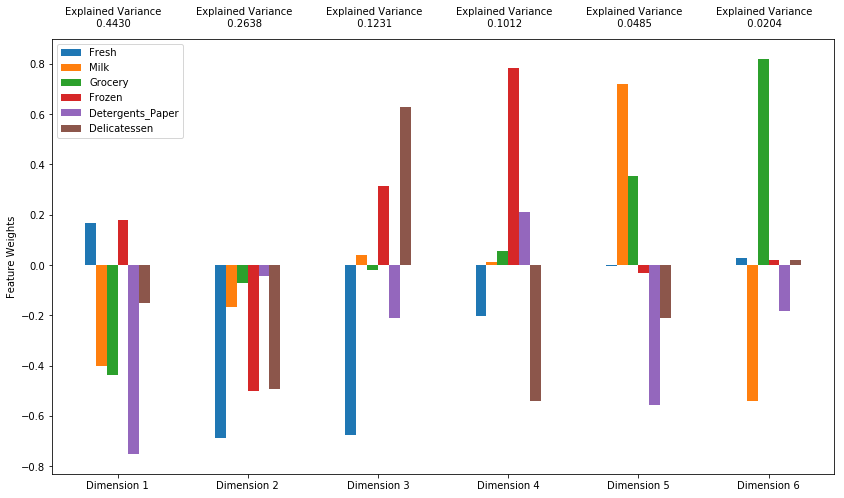

In [16]:
from  sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
no_of_components=len(features)
print(no_of_components)
pca = PCA(n_components=no_of_components,random_state=10)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
display(pca_results)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* 71.9 % is explained  by the first and second principal component
* 93.14% is explained by the first, second, third and fourth principal components.

## Components breakdown 

###  The first principal component (PC1):
    * Variance = 0.4430
    * The major role in variation is played by Detergents paper, milk and grocery. This is what we got earlier where we found that detergents paper, milk and grocery are correlated. Fresh and Frozen are in perfect contrast to milk , grocery, detergents paper. Variation due to delicacies is very limited.  
    
### The second principal component (PC2):
    Variance =0.2638
    * The major role in variation is associated with fresh, frozen and delicacies. By looking along with PC1 it makes sense since PC2 represents different features compared to PC1

### The Third Principal Component (PC3)
     Variance = 0.1231
    * The major role in variation is associated with increase in delicacies with corresponding decrease in fresh. 
### The fourth principal component (PC4)
     Variance = 0.1012
    * The major role in variation is associated with large increase in frozen with corresponding large decrease in delicasies. 

Reference : https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.0887      -0.7006       0.8537       1.0105      -0.5587   
1      -2.9903      -0.3645       0.2521       1.5653       0.1922   
2       2.6362      -2.3118       0.7328       0.4172       0.5960   

   Dimension 6  
0       0.2495  
1       0.1244  
2      -0.0324

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state=10)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.0887      -0.7006
1      -2.9903      -0.3645
2       2.6362      -2.3118

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

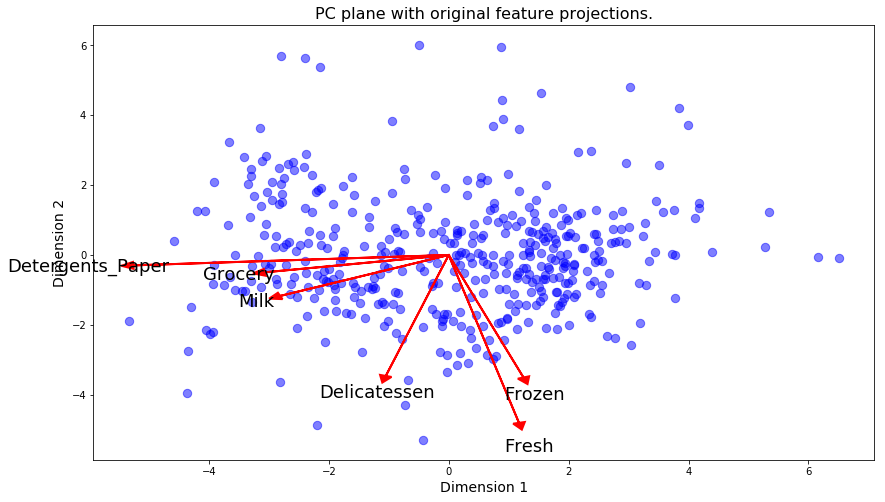

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Interpretation

* First component is strongly co-related with Detergent paper, Grocery, Milk. 
* Second component is strongly co-related with Delicasies , Fresh, Frozen

This is the same result,we got before. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

# K means clustering

## Advantages & Disadvantages
 * Hard assignment - Point explicityly belong to a cluster.
 * Guaranteed Convergence
 * Consistent and Scale invariant. 
 * The major disadvantage is that it is prone to outliers . 
 

# Gaussian Mixture model clustering
## Advantages
* Soft assignment. Probabilities are assigned to points and can belong to multiple clusters
* By looking at the probability value, we can see where the point can exactly belong to 
* Can model all elliptical clusters (vs K-Means which assumes clusters are spherical)

# Choosen Algorithm

Gausssian Mixture.
### Reason : There is no clear demarcation among data and hence it is difficult to put the data in to a single cluster. Soft assignment may be the correct approach. 

##### source : https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
##### source : http://playwidtech.blogspot.in/2013/02/k-means-clustering-advantages-and.html


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.


In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score   
total_clusters= list(range(2,20)) ## minimum 2 clusters. 
for n_clusters in total_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters,random_state=10).fit(reduced_data)



    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print("silhoueet_score for {} clusters is {}".format(n_clusters,score))

silhoueet_score for 2 clusters is 0.421916846463
silhoueet_score for 3 clusters is 0.375532188938
silhoueet_score for 4 clusters is 0.293269564847
silhoueet_score for 5 clusters is 0.318503760274
silhoueet_score for 6 clusters is 0.294294828555
silhoueet_score for 7 clusters is 0.33796693332
silhoueet_score for 8 clusters is 0.312429666347
silhoueet_score for 9 clusters is 0.307753432384
silhoueet_score for 10 clusters is 0.299186881946
silhoueet_score for 11 clusters is 0.31227195817
silhoueet_score for 12 clusters is 0.305886112962
silhoueet_score for 13 clusters is 0.295177790564
silhoueet_score for 14 clusters is 0.323622167443
silhoueet_score for 15 clusters is 0.314069461351
silhoueet_score for 16 clusters is 0.305032847685
silhoueet_score for 17 clusters is 0.308260902247
silhoueet_score for 18 clusters is 0.301980878262
silhoueet_score for 19 clusters is 0.329805340957


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
  ## Answer : printed above 
* Of these, which number of clusters has the best silhouette score?
  ## 2 clusters yield the best result.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [22]:
## Getting for the best cluster size 2

clusterer = GaussianMixture(n_components=2,random_state=10).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

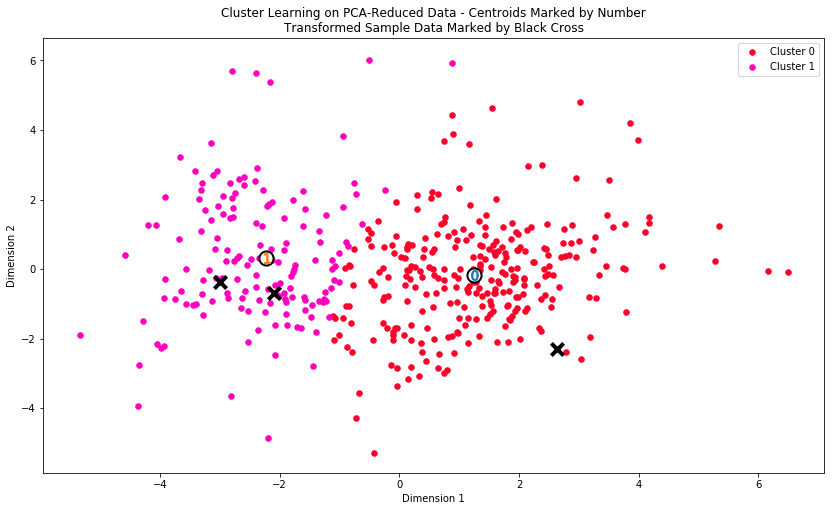

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8953.0  2114.0   2765.0  2075.0             353.0         732.0
Segment 1  3552.0  7837.0  12219.0   870.0            4696.0         962.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

In [25]:
## Lets calculate the difference from median to answer Question 8
display(true_centers-data.median())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   449.0 -1513.0  -1990.5   549.0            -463.5        -233.5
Segment 1 -4952.0  4210.0   7463.5  -656.0            3879.5          -3.5

**Answer:**
* To answer question 8, it is better to look at median than Mean. Mean is prone to outliers compared to median. The above code substracts mean from the results got for 2 segments and based on that following can be inferred. 
#### Segment 0 - Have spends above median for Fresh and Frozen .This represents specialiased restaurants or markets specialising in areas like sea food. 
#### Segment 1 - Have spens above median in Milk, Grocery and Detergents paper and this could represent a large retailer. 




### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)
display(samples)

('Sample point', 0, 'predicted to be in Cluster', 1)
('Sample point', 1, 'predicted to be in Cluster', 1)
('Sample point', 2, 'predicted to be in Cluster', 0)


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   3366   5403    12974    4400              5977          1744
1   3067  13240    23127    3941              9959           731
2  27167   2801     2128   13223                92          1902

**Answer:**
* Sample 1:
Spending on "Milk", "Grocery" And "Detergents_Paper" is high. Hence it belongs to Cluster 1
* Sample 2:
The spending on "Milk", "Grocery" and "Detergents_Paper" is high. Hence it belongs to cluster 1 
* Sample 3:
Spending on "Fresh" and "Frozen" is high with very little spending on other categories. Hence it belongs to Cluster 0. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

In A/B testing, which is also called split testing we check the output with two variants A and B. As the name implies, two versions (A and B) are compared, which are identical except for one variation that might affect a user's behavior. In our case variation is nothing but change in delivery service from 5 days to 3 days. So what we can do is to see customer satisfaction score when variable A (No change in delivery service, business as usual) compares to Variable B (Change in delivery service from 5 days to 3 days). Also we assume that all other parameters are kept as it is. Only change is the change in the delivery service. 

* Before doing a change to all customers. It is better to take a random sample of let’s say around 5% from each of these clusters. 
* From 5% on each cluster, lets form two groups
  Cluster 0 - Group 1, Group 2. Lets call them as C0G1, C0G2
  Cluster 1 - Group 3 , Group 4. Lets call them as C1G3, C1G4.
   
  
* Implement the change in delivery service for C0G1 from 5 days a week to 3 days a week. For C0G2,, let the delivery service remain same as it is before. Lets get a feedback from the customers.  Assign different scores for customer satisfaction for both these groups. Strongly positive +1, Strongly negative -1. 
* Implement the change in delivery service for C1G3 from 5 days a week to 3 days a week. For C1G4, let the delivery service remain same as it is before. Lets get a feedback from the customers.  Assign different scores for customer satisfaction for both these groups. Strongly positive +1, Strongly negative -1.
* Run this survey for a duration which will gauge the impact. Any change generally results in negative perception initially. So let the system settle down and then gauge the impact. 
* Cross reference the customer satisfaction score with spending for C0G1 against C0G2 , C1G3 against C1G4. Any outliers (eg : low customer score but increased spending), remove it by doing comparing with central tendencies. 
* If the customer satisfaction score is poor for C0G1 compared to C0G2 then the change in delivery service has negatively impacted the business. Understand the reasons behind it and take corrective actions.
* If the customer satisfaction score is poor for C0G3 compared to C0G4 , then the change in delivery service has negatively impacted the business. understand the reasons behind it and take corrective actions. 

###### Notes : 
* Intutively if we see for Cluster 0 , the products are mostly perishable. I feel change in delivery service will impact the customer satisfaction score, mostly positive, since we are replenishing the stocks sooner (5 days compared to 3 days)
* Intutively if we see for Cluster 1, the products are mostly non-perishable. I feel change in delivery service might impact the customer satisfaction score negative, since we are replenishing the stocks soon which may not be needed. The stores may not have space to store the new items if the inventory is not sold. 
* Again intutions for both the cases can be confirmed by formulating hypothesis and testing those hypothesis by evaluating the t-scores or the z-scores. 
* Also having one similar delivery service for both the clusters may not be feasible considering that they serve predominatly different sections (perishable vs non-perishable). 
        
* Once we are satisfied, we can target for 30%, 50%, 75%, 100% customers so that further fine tuning is possible. 

Source :

https://en.wikipedia.org/wiki/A/B_testing

https://www.quora.com/When-should-A-B-testing-not-be-trusted-to-make-decisions/answer/Edwin-Chen

http://multithreaded.stitchfix.com/blog/2015/05/26/significant-sample/

http://techblog.netflix.com/2016/04/its-all-about-testing-netflix.html

https://vwo.com/ab-testing/


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* Target Variable : Customer Segment (clusters/Segments 0 and 1 )
* we could use any suitable classifier algorithm like support vector machines, naive bayes, logistic regression . 



### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

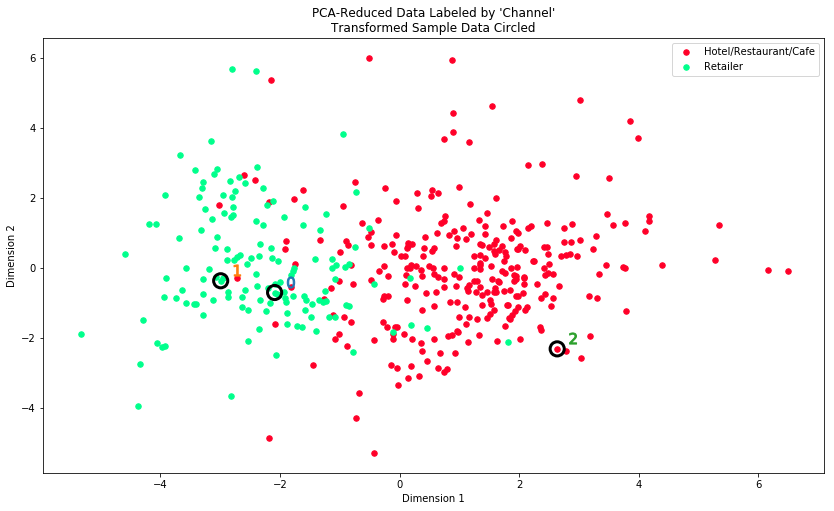

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, duplicate_outliers, pca_samples)


### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

Clustering algorithm did well since it is able to map to the two clusters. 
Yes. Customer segements on extremes (lef and right) can be classified as "Retailers" or "Hotels/"Restaurants/Cafes"
This underlying classification is consistent with our observation where we noted cluster 1 customers are typically retailers and and cluster 0 customers are super markets, cafe etc.  